# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.111118e+01     6.839337e+00
 * time: 0.0018389225006103516
     1     3.039584e+01     4.932425e+00
 * time: 0.007344961166381836
     2     2.285889e+01     6.811573e+00
 * time: 0.06232786178588867
     3     1.946169e+01     7.763798e+00
 * time: 0.06770992279052734
     4     1.705655e+01     7.138125e+00
 * time: 0.0731198787689209
     5     1.318326e+01     5.467750e+00
 * time: 0.07757687568664551
     6     9.713956e+00     1.598332e+00
 * time: 0.08190679550170898
     7     8.919919e+00     1.401212e+00
 * time: 0.08540892601013184
     8     8.582602e+00     8.238192e-01
 * time: 0.08902502059936523
     9     8.367627e+00     6.303702e-01
 * time: 0.09245586395263672
    10     8.224706e+00     6.613198e-01
 * time: 0.09652590751647949
    11     8.220701e+00     9.874825e-01
 * time: 0.09980201721191406
    12     8.170961e+00     7.296949e-01
 * time: 0.1030588150024414
    13     8.100035e+00     5.965070e-01
 * time

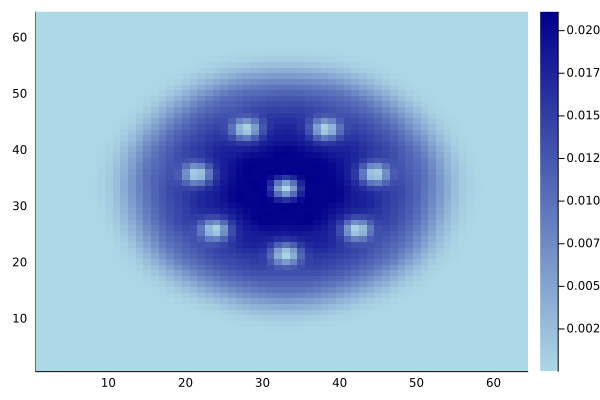

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)